In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [41]:
data = pd.read_csv('Final_LUSC_data.csv')

In [42]:
data

,Type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,U6,U7,U8,VAMP7,Vault,WASH6P,WASIR1,Y_RNA,ZBED1,ZNF883
0,Cancer,1193.0,1.0,950.0,637.0,423.0,1647.0,2956.0,1845.0,5905.0,...,1193.0,1647.0,1193.0,950.0,1193.0,1193.0,1.0,1.0,1.0,1.0
1,Cancer,1107.0,1.0,1046.0,1400.0,1450.0,501.0,566.0,1133.0,1388.0,...,1107.0,501.0,1107.0,1046.0,1107.0,1107.0,1.0,0.0,1.0,1.0
2,Cancer,1047.0,0.0,2706.0,206.0,276.0,164.0,1637.0,2318.0,1614.0,...,1047.0,164.0,1047.0,2706.0,1047.0,1047.0,0.0,12.0,0.0,0.0
3,Cancer,2094.0,0.0,861.0,1253.0,1089.0,974.0,1532.0,3774.0,4877.0,...,2094.0,974.0,2094.0,861.0,2094.0,2094.0,0.0,1.0,0.0,0.0
4,Normal,1017.0,1.0,767.0,596.0,289.0,3405.0,2068.0,2147.0,725.0,...,1017.0,3405.0,1017.0,767.0,1017.0,1017.0,1.0,3168.0,1.0,1.0
5,Normal,485.0,0.0,493.0,296.0,162.0,2258.0,5015.0,2048.0,611.0,...,485.0,2258.0,485.0,493.0,485.0,485.0,0.0,2466.0,0.0,0.0
6,Normal,790.0,2.0,590.0,396.0,215.0,2422.0,2750.0,1465.0,554.0,...,790.0,2422.0,790.0,590.0,790.0,790.0,2.0,2277.0,2.0,2.0
7,Normal,1728.0,8.0,1385.0,1018.0,495.0,3530.0,11958.0,2278.0,852.0,...,1728.0,3530.0,1728.0,1385.0,1728.0,1728.0,8.0,4270.0,8.0,8.0


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [67]:
data['Type'] = 1 -le.fit_transform(data['Type'])

In [28]:
X = data.drop('Type', axis=1)
y = data['Type']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
reg = linear_model.LassoCV(cv=5).fit(X, y)
# reg.fit(X_train, y_train)
# reg.predict(X_test)
coef = np.abs(reg.coef_)
important_genes = coef.argsort()[-100:][::-1]
expression_data_selected = data.drop('Type', axis=1).iloc[:, important_genes]

In [74]:
expression_data_selected.columns

Index(['EEF1A1', 'ACTB', 'B2M', 'MT-CO1', 'MTMR2', 'NPY2R', 'KRT5', 'FAM99B',
       'DEFB136', 'DEFB135', 'DEFB134', 'FAM90A2P', 'RPS3AP47', 'KRTAP5-1',
       'KRTAP5-2', 'FAM99A', 'C1QTNF9B', 'KRTAP5-6', 'PCOTH', 'LRRC72',
       'NANOGNB', 'C22orf42', 'RFPL3S', 'OR7E91P', 'CLEC6A', 'TTC23L',
       'LINC00487', 'GMNC', 'C16orf96', 'C1RL-AS1', 'AC108134.1', 'TPTE2P6',
       'OR7E136P', 'OR7E161P', 'IFITM5', 'DEFB109C', 'DNAJC19', 'NYNRIN',
       'AC091951.1', 'AC074389.1', 'AC105345.1', 'HSP90AA5P', 'USP17L6P',
       'DAZ2', 'HSP90AB2P', 'RNPS1', 'PPP1R12BP2', 'C21orf62-AS1', 'C21orf62',
       'OLIG2', 'CEMP1', 'ONECUT3', 'PDPK2P', 'DAZ4', 'SRRM2-AS1', 'ZNF316',
       'BHLHA9', 'AC019155.1', 'AC024132.1', 'KLRC3', 'Z99774.1', 'MFSD2B',
       'DPF3', 'AC020741.1', 'TECRL', 'SMIM11A', 'ACOT6', 'ARSH', 'LIN52',
       'AL035696.1', 'HTN3', 'AC025186.1', 'CDPF1', 'VCX3B', 'LINC00583',
       'KLRC2', 'LINC00898', 'LINC01310', 'LCMT1', 'LINC01446', 'AL591499.1',
       'AP001042.1'

In [36]:
from sklearn.linear_model import ElasticNetCV
elastic_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5).fit(X, y)
coef = np.abs(elastic_net.coef_)
important_genes_1 = coef.argsort()[-50:][::-1]
expression_data_selected_1 = X.iloc[:, important_genes]

In [39]:
expression_data_selected_1.columns.sort_values()

Index(['AC019155.1', 'AC020741.1', 'AC024132.1', 'AC025186.1', 'AC068533.1',
       'AC074389.1', 'AC091951.1', 'AC098591.2', 'AC105345.1', 'AC108134.1',
       'AC211476.1', 'ACOT6', 'ACTB', 'ADARB2-AS1', 'AL035696.1', 'AL390205.1',
       'AL591499.1', 'AP001042.1', 'ARRDC5', 'ARSH', 'B2M', 'BHLHA9',
       'C16orf96', 'C1QTNF9B', 'C1RL-AS1', 'C21orf62', 'C21orf62-AS1',
       'C22orf42', 'CDPF1', 'CEMP1', 'CLEC6A', 'CYP2D7', 'CYS1', 'DAZ2',
       'DAZ4', 'DEFB109C', 'DEFB134', 'DEFB135', 'DEFB136', 'DENND6B',
       'DNAJC19', 'DPF3', 'DPP9-AS1', 'EEF1A1', 'EIF3CL', 'FAM90A2P', 'FAM99A',
       'FAM99B', 'GAGE1', 'GMNC', 'HSP90AA5P', 'HSP90AB2P', 'HTN3', 'IFITM5',
       'KLRC2', 'KLRC3', 'KRT5', 'KRTAP5-1', 'KRTAP5-2', 'KRTAP5-6', 'LCMT1',
       'LIN52', 'LINC00487', 'LINC00583', 'LINC00898', 'LINC01310',
       'LINC01446', 'LINC01531', 'LINC01597', 'LOH12CR2', 'LRRC72', 'MANSC4',
       'MFSD2B', 'MT-CO1', 'MTMR2', 'MUC19', 'NANOGNB', 'NPY2R', 'NYNRIN',
       'OLIG2', 'ONECUT3

In [50]:
upregulated_genes = res[(res['pvalue'] < 0.05) & (res['log2FoldChange'] >= 1)]
upregulated_genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
C1orf112,511.250427,1.646190,0.505046,3.259488,1.116137e-03,2.007040e-03
GCLC,1934.650999,2.312803,0.486333,4.755597,1.978612e-06,5.187205e-06
MYH16,13.546331,2.199766,0.696740,3.157228,1.592767e-03,2.787804e-03
HS3ST1,294.293750,7.178032,0.752919,9.533603,1.519177e-21,1.647701e-20
AOC1,155.403734,3.545154,1.001741,3.538993,4.016565e-04,7.737381e-04
...,...,...,...,...,...,...
AC010980.1,11.735285,7.113368,1.742652,4.081921,4.466499e-05,9.855719e-05
AC073611.1,8.156618,6.598378,1.959542,3.367306,7.590630e-04,1.402165e-03
AL592295.6,40.356750,8.892086,1.763719,5.041668,4.614922e-07,1.299498e-06
AL391628.1,1.212515,3.832973,1.889744,2.028303,4.252936e-02,5.548594e-02


In [55]:
selected_genes_de = upregulated_genes.index.append(downregulated_genes.index)

In [56]:
selected_genes_de

Index(['C1orf112', 'GCLC', 'MYH16', 'HS3ST1', 'AOC1', 'LASP1', 'TMEM176A',
       'M6PR', 'CFLAR', 'NDUFAF7',
       ...
       'MMP23B', 'SH2D5', 'USP32P3', 'NCR1', 'RASSF10', 'RNU1-75P', 'MIR494',
       'RNU1-15P', 'U7', 'Y_RNA'],
      dtype='object', length=23596)

In [58]:
selected_data_from_de = data[selected_genes_de]

In [84]:
X = data[expression_data_selected_1.columns]
y = data['Type']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [86]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
y_train = y_train.astype(float)
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 0.0820 - val_loss: 0.0828
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0789 - val_loss: 0.0796
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0758 - val_loss: 0.0763
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0726 - val_loss: 0.0729
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0693 - val_loss: 0.0695
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0660 - val_loss: 0.0660
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0626 - val_loss: 0.0625
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0591 - val_loss: 0.0590
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0556 - val_loss: 0.0557
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0520 - val_loss: 0.0523
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0484 - val_loss: 0.0488
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0447 - val_loss: 0.0

<Axes: >

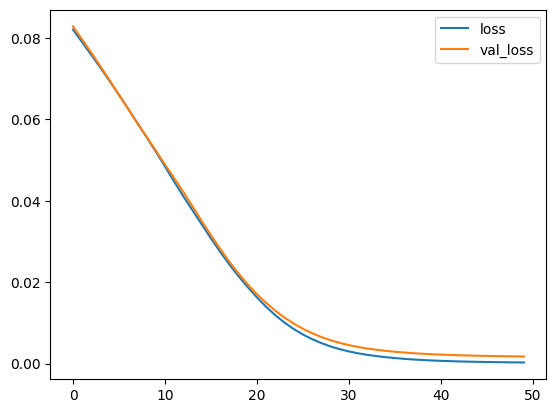

In [90]:
pd.DataFrame(model.history.history).plot()

In [52]:
downregulated_genes = res[(res['pvalue'] < 0.05) & (res['log2FoldChange'] < 1)]
downregulated_genes

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
FGR,1713.329271,-1.962320,0.512582,-3.828300,1.290313e-04,2.670140e-04
NIPAL3,1601.258560,-1.034550,0.252421,-4.098508,4.158221e-05,9.222619e-05
HECW1,5046.887116,-6.948948,0.776591,-8.948011,3.619466e-19,3.326320e-18
MAD1L1,399.401741,-5.001833,0.428387,-11.675963,1.691392e-31,3.308013e-30
SNX11,2443.319673,-1.201672,0.453571,-2.649358,8.064495e-03,1.245323e-02
...,...,...,...,...,...,...
RNU1-75P,1074.484692,-13.472860,1.639619,-8.217070,2.085360e-16,1.541799e-15
MIR494,92.465510,-9.936596,1.690030,-5.879538,4.114138e-09,1.456384e-08
RNU1-15P,1759.796425,-14.184538,1.751864,-8.096828,5.641058e-16,4.013559e-15
U7,1713.329271,-1.962320,0.512582,-3.828300,1.290313e-04,2.670140e-04


In [40]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [92]:
mod_df = data.set_index('Type')
metadata = pd.DataFrame(zip(mod_df.index, np.repeat(['Cancer', 'Normal'], [4, 4])), columns=['Sample', 'Type'])
metadata.set_index('Sample', inplace=True)
diff_data = mod_df
diff_data = diff_data.astype('int64')
dds = DeseqDataSet(counts=diff_data, metadata=metadata, design_factors='Type')
dds.obs_names_make_unique()
dds.deseq2()
stat_res = DeseqStats(dds, contrast=('Type', 'Cancer', 'Normal'))
stat_res.summary()
res = stat_res.results_df
res

C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Fitting size factors...
... done in 0.17 seconds.

Fitting dispersions...
... done in 18.13 seconds.

Fitting dispersion trend curve...
C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\pydeseq2\dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 1.83 seconds.

Fitting MAP dispersions...
... done in 26.43 seconds.

Fitting LFCs...
... done in 13.52 seconds.

Replacing 0 outlier genes.

Running Wald tests...

Log2 fold change & Wald test p-value: Type Cancer vs Normal
             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
TSPAN6    1143.528735        0.750632  0.397027  1.890633  5.867339e-02   
TNMD         1.113278       -1.973692  1.448516 -1.362562  1.730206e-01   
DPM1      1322.596383        1.493423  0.784095  1.904644           NaN   
SCYL3      641.813454        0.733637  0.472771  1.551779  1.207150e-01   
C1orf112   511.250427        1.646190  0.505046  3.259488  1.116137e-03   
...               ...             ...       ...       ...           ...   
WASH6P    1143.528735        0.750632  0.397027  1.890633  5.867339e-02   
WASIR1       1.113278       -1.973692  1.448516 -1.362562  1.730206e-01   
Y_RNA     1395.001545       -8.866800  1.329887 -6.667332  2.604961e-11   
ZBED1        1.113278       -1.973692  1.448516 -1.362562  1.730206e-01   
ZNF883       1.113278       -1.973692  1.448516 -1.362562  1.730206e-01   

                  padj  
TSPAN6    7.37

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,1143.528735,0.750632,0.397027,1.890633,5.867339e-02,7.376774e-02
TNMD,1.113278,-1.973692,1.448516,-1.362562,1.730206e-01,1.941551e-01
DPM1,1322.596383,1.493423,0.784095,1.904644,NaN,NaN
SCYL3,641.813454,0.733637,0.472771,1.551779,1.207150e-01,1.395053e-01
C1orf112,511.250427,1.646190,0.505046,3.259488,1.116137e-03,2.007040e-03
...,...,...,...,...,...,...
WASH6P,1143.528735,0.750632,0.397027,1.890633,5.867339e-02,7.376774e-02
WASIR1,1.113278,-1.973692,1.448516,-1.362562,1.730206e-01,1.941551e-01
Y_RNA,1395.001545,-8.866800,1.329887,-6.667332,2.604961e-11,1.166480e-10
ZBED1,1.113278,-1.973692,1.448516,-1.362562,1.730206e-01,1.941551e-01


In [28]:
res.loc[selected_features]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
FGR,1713.329271,-1.962320,0.512582,-3.828300,1.290313e-04,2.670140e-04,FGR
GCLC,1934.650999,2.312803,0.486333,4.755597,1.978612e-06,5.187205e-06,GCLC
ENPP4,1093.137588,-1.142031,0.603781,-1.891467,5.856209e-02,7.376774e-02,ENPP4
MAD1L1,399.401741,-5.001833,0.428387,-11.675963,1.691392e-31,3.308013e-30,MAD1L1
M6PR,2093.784795,4.182691,0.408419,10.241187,1.296364e-24,1.711326e-23,M6PR
CFLAR,2002.565562,3.022698,0.250846,12.050031,1.938769e-33,4.214660e-32,CFLAR
AK2,3501.436555,1.519383,0.503216,3.019344,2.533226e-03,4.283998e-03,AK2
KDM1A,1719.260935,2.979431,0.309852,9.615667,6.866298e-22,7.627901e-21,KDM1A
SLC22A16,9.140527,0.280640,1.340438,0.209365,8.341636e-01,8.431484e-01,SLC22A16
SKAP2,927.804408,1.661486,0.508141,3.269735,1.076483e-03,1.941164e-03,SKAP2


In [37]:
res.iloc[2239].pvalue

2.8518412932281235e-303

In [35]:
res['pvalue'].argmin()

2239

In [20]:
from sanbomics.plots import volcano

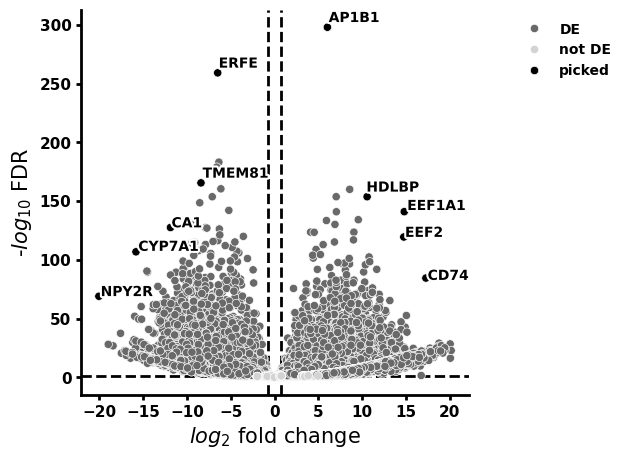

In [40]:
volcano(res, symbol='symbol')

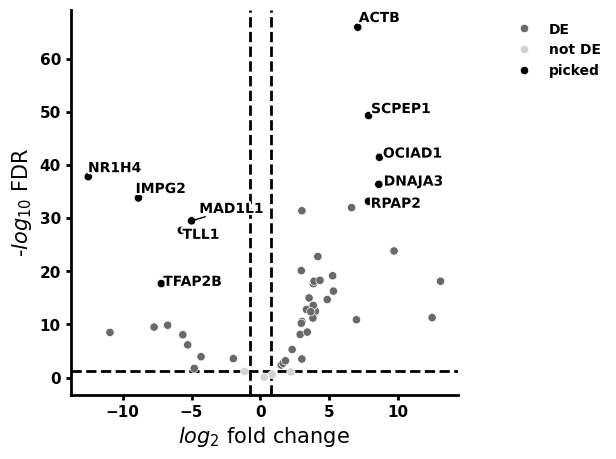

In [38]:
volcano(res.loc[selected_features], symbol="symbol")

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV

In [54]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
importance = np.abs(ridge.coef_)

In [55]:
threshold = np.sort(importance)[-3] + 0.01

sfm = SelectFromModel(ridge, threshold=threshold).fit(X_train, y_train)

sfm.get_support()

array([False, False, False, ..., False, False, False])

In [56]:
X.columns[sfm.get_support()]

Index([], dtype='object')

In [57]:
from sklearn.linear_model import LogisticRegression

In [60]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [61]:
clf.predict(X_test)

array([ True, False])

In [62]:
y_test

1     True
5    False
Name: Type_Cancer, dtype: bool